## Analysis of 1st day in the RCF study
Checking amygdala activation in the CS+US condition of the task
- masking amygdala
- avergaing activation
- plot

In [355]:
# load libraries
import glob
import pandas as pd
import numpy as np
import nilearn
import nilearn.plotting
import nilearn.input_data
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [390]:
## this subject list is based on reaction to the US in SCR (Nachshon analyzed it)
subject_list = ['020','029','030','040','1005', '1072', '1074', '1099', '1205',
       '1206', '1212', '1216',  '1223', '1237', '1245', '1247',
       '1254', '1258', '1266', '1268', '1272', '1280',
       '1290', '1291', '1301', '1309',  '1320', '1337', '1340',
       '1343', '1345', '1346', '1350', '1357', '1359', '1362', '1373',
       '1374', '1378', '1379', '1384', '1388', '1392', '1393',
       '1431', '1432', '1440', '1449', '1457', '1460'] # '1269','1271','1319','1220',  '1376',

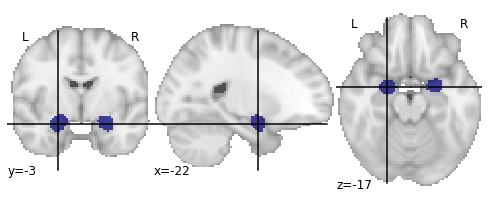

In [381]:
# load mask
mask_file = '/media/Data/work/KPE_ROI/amygdala_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=25", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)

# create a masker 
fwhm = 4
masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=fwhm, standardize=False, detrend=False, verbose=5)

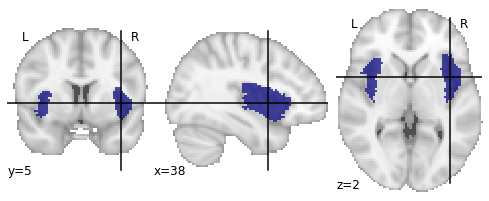

In [382]:
# load mask of insula
mask_file = '/media/Data/work/insula_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=8", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)

# create a masker 
fwhm = 4
masker_ins = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=fwhm, standardize=False, detrend=False, verbose=5)

['/media/Data/Lab_Projects/RCF/neuroimaging/RCF_Bids/derivatives/fmriprep/sub-038/ses-1/func/sub-038_ses-1_task-task509_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', '/media/Data/Lab_Projects/RCF/neuroimaging/RCF_Bids/derivatives/fmriprep/sub-1221/ses-1/func/sub-1221_ses-1_task-task505_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', '/media/Data/Lab_Projects/RCF/neuroimaging/RCF_Bids/derivatives/fmriprep/sub-1271/ses-1/func/sub-1271_ses-1_task-task505_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', '/media/Data/Lab_Projects/RCF/neuroimaging/RCF_Bids/derivatives/fmriprep/sub-1373/ses-1/func/sub-1373_ses-1_task-task505_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', '/media/Data/Lab_Projects/RCF/neuroimaging/RCF_Bids/derivatives/fmriprep/sub-1340/ses-1/func/sub-1340_ses-1_task-task505_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', '/media/Data/Lab_Projects/RCF/neuroimaging/RCF_Bids/derivatives/fmriprep/sub-1389/ses-1/func/sub-1389_ses-1_tas

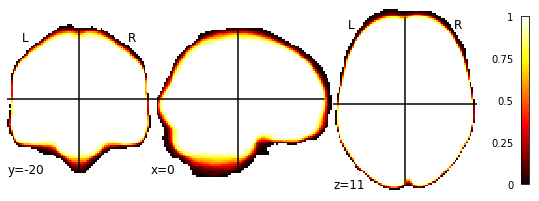

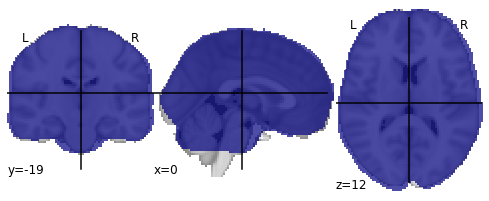

In [383]:
# load mask of brain
brainmasks = glob.glob('/media/Data/Lab_Projects/RCF/neuroimaging/RCF_Bids/derivatives/fmriprep/sub-*/ses-1/func/sub-*_ses-1_task-task5*_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz')
print(brainmasks)
%matplotlib inline
#for mask in brainmasks:
 #   nilearn.plotting.plot_roi(mask)
    
mean_mask = nilearn.image.mean_img(brainmasks)
nilearn.plotting.plot_stat_map(mean_mask)
group_mask = nilearn.image.math_img("a>=0.95", a=mean_mask)
nilearn.plotting.plot_roi(group_mask)

# create a masker 
fwhm = 4
maskerWhole = nilearn.input_data.NiftiMasker(mask_img=group_mask, 
                               sessions=None, smoothing_fwhm=fwhm, standardize=False, detrend=False, verbose=5)

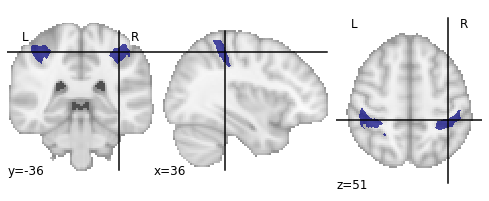

In [384]:
# using SPM anatomy toolbox to generate postcentral Gyrus
img = '/media/Data/work/ROI_postcentral_MNI.img'
nilearn.plotting.plot_roi(img)

fwhm = 4
maskerSom = nilearn.input_data.NiftiMasker(mask_img=img, 
                               sessions=None, smoothing_fwhm=fwhm, standardize=False, detrend=False, verbose=5)

## Start with looking at amygdala activation in the first and second half of experiment
Comparing CS+ to CS- in each of them
- So we expect a difference in activation at the first half and no difference at the second
- Should be similar to both stimuli (reminded and nonreminded)

In [388]:
us_cond = '/media/Data/work/RCF_or/Sink_resp/1stLevel/_subject_id_{sub}/_modelestimate0/results/cope{cope_num}.nii.gz'
cope_num = 4#taking shock vs. noshock


In [391]:
us = []
timeseriesAmg = []
for sub in subject_list:
    func = us_cond.format(sub=sub, cope_num= cope_num)
    print(func)
    sub = func.split('id_')[1].split('/')[0]
    print(sub)
    # amygdala
    tArr = masker.fit_transform(func)
    meanT = np.mean(tArr,axis=1)
    sem = scipy.stats.sem(tArr, axis=1)
    std = np.std(tArr, axis=1)
    # take insula
    insArr = masker_ins.fit_transform(func)
    insMean = np.mean(insArr, axis=1)
    insStd = np.std(insArr, axis=1)
    #take whole brain
    wholeArr = maskerWhole.fit_transform(func)
    wholeMean = np.mean(wholeArr, axis=1)
    wholeStd = np.std(wholeArr, axis=1)
    # postcentral
    postArr = maskerSom.fit_transform(func)
    postMean = np.mean(postArr, axis=1)
    postStd = np.std(postArr, axis=1)
    
    print(meanT)
    # create datafram for the timeseries
    dfTS = {'subject':sub, 'ts':tArr[0]}
    # create dataframe for the mean activation
    df = {'subject':sub, 'amygdala':meanT[0], 'amgsem':sem[0], 'amgstd':std[0], 'insula':insMean[0],
         'insulaStd':insMean[0], 'PC': postMean[0], 'PCstd': postStd[0],
          'wholeBrain':wholeMean[0], 'wholeStd':wholeStd[0]}
    #df['subject'] = sub
    us.append(df)
    timeseriesAmg.append(dfTS)
amg_ud = pd.DataFrame(us)
tsDf = pd.DataFrame(timeseriesAmg)

/media/Data/work/RCF_or/Sink_resp/1stLevel/_subject_id_020/_modelestimate0/results/cope4.nii.gz
020
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMa

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[0.04248059]
/media/Data/work/RCF_or/Sink_resp/1stLevel/_subject_id_1005/_modelestimate0/results/cope4.nii.gz
1005
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
     

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Smoothing

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[0.34133583]
/media/Data/work/RCF_or/Sink_resp/1stLevel/_subject_id_1247/_modelestimate0/results/cope4.nii.gz
1247
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
sha

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Smoothing

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[1.2492303]
/media/Data/work/RCF_or/Sink_resp/1stLevel/_subject_id_1320/_modelestimate0/results/cope4.nii.gz
1320
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shap

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Smoothing

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[0.19244322]
/media/Data/work/RCF_or/Sink_resp/1stLevel/_subject_id_1374/_modelestimate0/results/cope4.nii.gz
1374
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
sha

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Smoothing

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[0.43217906]
/media/Data/work/RCF_or/Sink_resp/1stLevel/_subject_id_1457/_modelestimate0/results/cope4.nii.gz
1457
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
sha

In [392]:
amg_ud

,subject,amygdala,amgsem,amgstd,insula,insulaStd,PC,PCstd,wholeBrain,wholeStd
0,020,0.439733,0.024236,0.572497,0.524512,0.524512,-0.211218,0.265978,-0.155839,0.539576
1,029,0.894034,0.039058,0.922628,0.716979,0.716979,0.729067,0.487049,0.723892,1.088020
2,030,-0.202902,0.042334,1.000009,1.264694,1.264694,0.196072,0.510526,0.477430,1.134568
3,040,0.042481,0.026563,0.627476,0.021910,0.021910,-0.007512,0.317194,-0.271031,0.623235
4,1005,0.665053,0.071620,1.691820,0.430266,0.430266,-1.256125,1.263220,-0.194573,1.771012
5,1072,1.484799,0.049571,1.170967,1.339894,1.339894,0.331123,0.559666,0.453995,0.829186
6,1074,0.094775,0.039410,0.930932,0.834434,0.834434,0.459120,0.893661,0.156909,0.774026
7,1099,0.896116,0.036809,0.869508,0.698377,0.698377,0.129129,0.409967,-0.107104,0.753781
8,1205,0.939321,0.034380,0.812124,0.348112,0.348112,0.324000,0.403280,0.287271,0.741713
9,1206,0.865302,0.045318,1.070509,1.069766,1.069766,0.700261,0.567793,0.597585,0.830812


## Now we will use mean activation to assess learning reaction in participants

In [393]:
amg_ud

,subject,amygdala,amgsem,amgstd,insula,insulaStd,PC,PCstd,wholeBrain,wholeStd
0,020,0.439733,0.024236,0.572497,0.524512,0.524512,-0.211218,0.265978,-0.155839,0.539576
1,029,0.894034,0.039058,0.922628,0.716979,0.716979,0.729067,0.487049,0.723892,1.088020
2,030,-0.202902,0.042334,1.000009,1.264694,1.264694,0.196072,0.510526,0.477430,1.134568
3,040,0.042481,0.026563,0.627476,0.021910,0.021910,-0.007512,0.317194,-0.271031,0.623235
4,1005,0.665053,0.071620,1.691820,0.430266,0.430266,-1.256125,1.263220,-0.194573,1.771012
5,1072,1.484799,0.049571,1.170967,1.339894,1.339894,0.331123,0.559666,0.453995,0.829186
6,1074,0.094775,0.039410,0.930932,0.834434,0.834434,0.459120,0.893661,0.156909,0.774026
7,1099,0.896116,0.036809,0.869508,0.698377,0.698377,0.129129,0.409967,-0.107104,0.753781
8,1205,0.939321,0.034380,0.812124,0.348112,0.348112,0.324000,0.403280,0.287271,0.741713
9,1206,0.865302,0.045318,1.070509,1.069766,1.069766,0.700261,0.567793,0.597585,0.830812


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


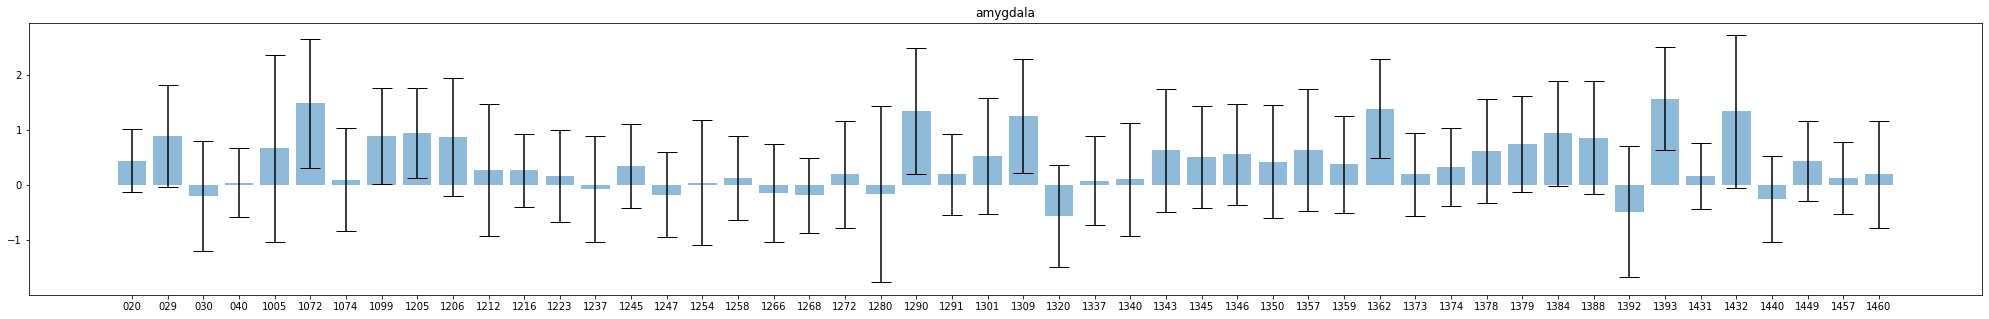

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


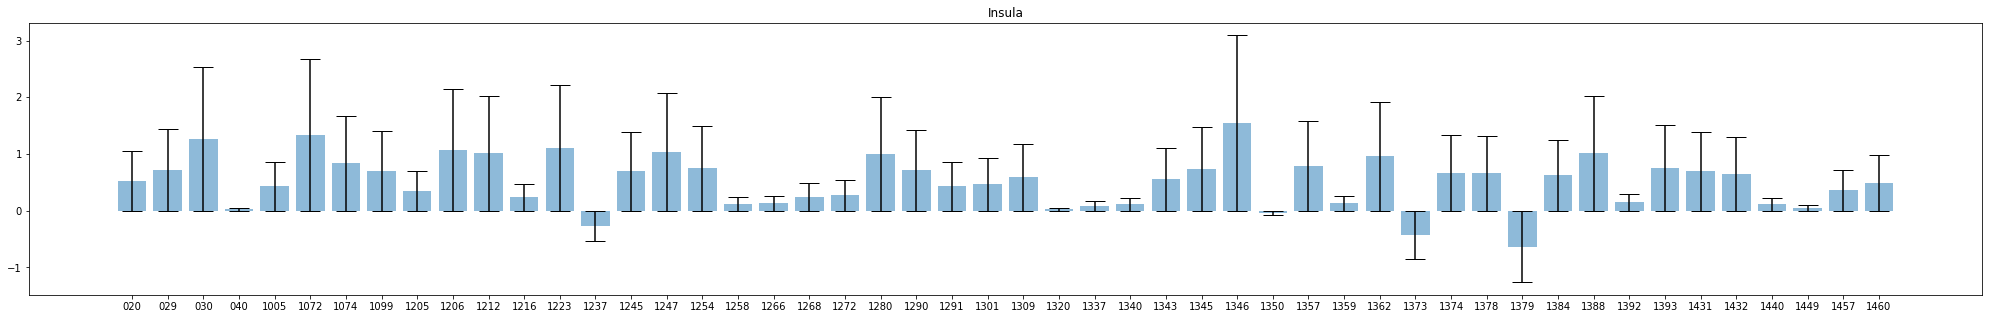

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


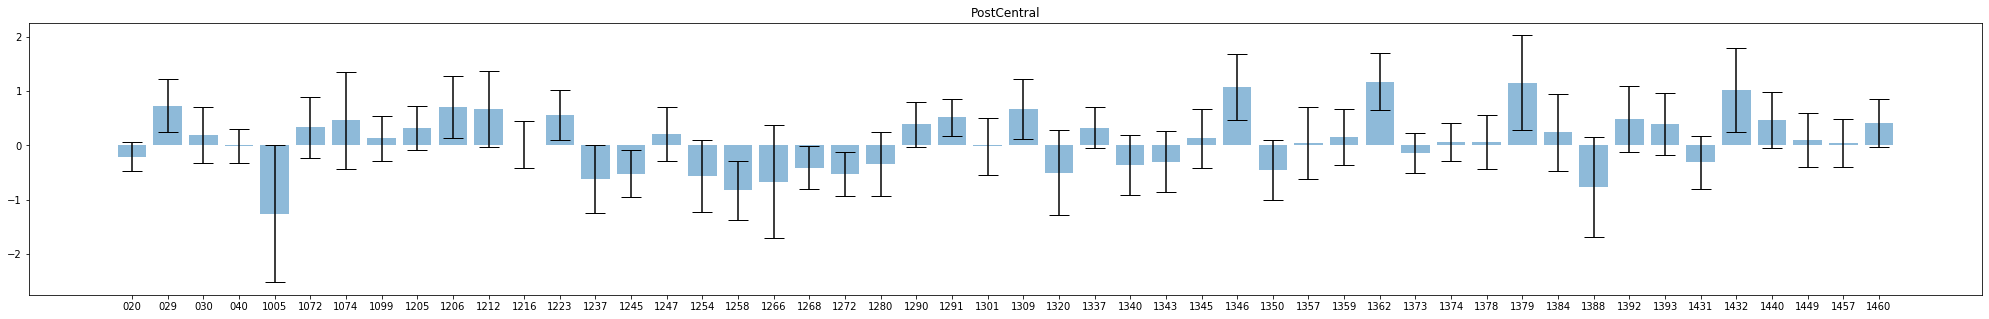

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<BarContainer object of 50 artists>

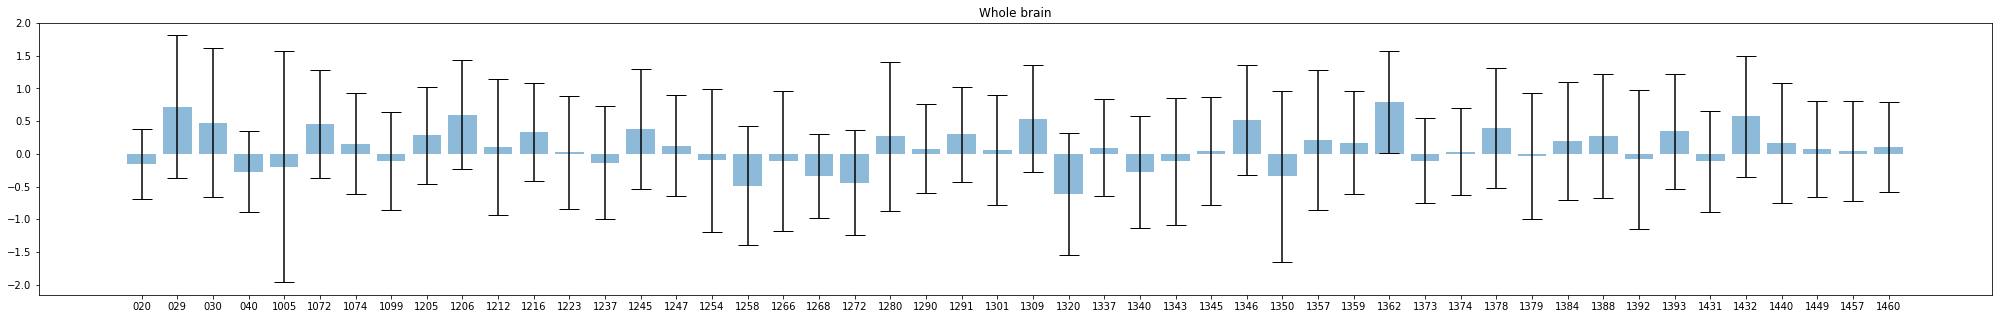

In [394]:
plt.figure(figsize=(35,5))
plt.title("amygdala")
x = np.array(amg_ud.subject)
y = np.array(amg_ud.amygdala)
error = np.array(amg_ud['amgstd'])
plt.bar(x, y, yerr = error,align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
plt.show()
plt.figure(figsize=(35,5))
plt.title("Insula")
x = np.array(amg_ud.subject)
y = np.array(amg_ud.insula)
error = np.array(amg_ud.insulaStd)
plt.bar(x, y, yerr = error,align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
plt.show()

plt.figure(figsize=(35,5))
plt.title("PostCentral")
x = np.array(amg_ud.subject)
y = np.array(amg_ud.PC)
error = np.array(amg_ud.PCstd)
plt.bar(x, y, yerr = error,align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

plt.show()
plt.figure(figsize=(35,5))
plt.title("Whole brain")
x = np.array(amg_ud.subject)
y = np.array(amg_ud.wholeBrain)
error = np.array(amg_ud.wholeStd)
plt.bar(x, y, yerr = error,align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

(0.32484149305997034, 0.021352717555737106)

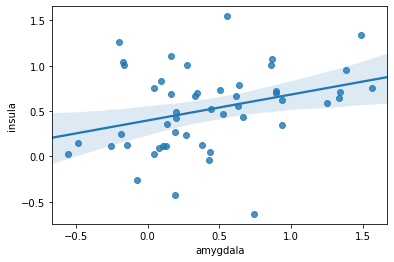

In [395]:
sns.regplot('amygdala','insula', data=amg_ud)
scipy.stats.pearsonr(amg_ud.amygdala, amg_ud.insula)

(0.5513162089002239, 3.333972756801811e-05)

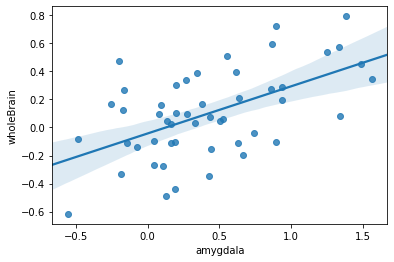

In [396]:
sns.regplot('amygdala','wholeBrain', data=amg_ud)
scipy.stats.pearsonr(amg_ud.amygdala, amg_ud.wholeBrain)

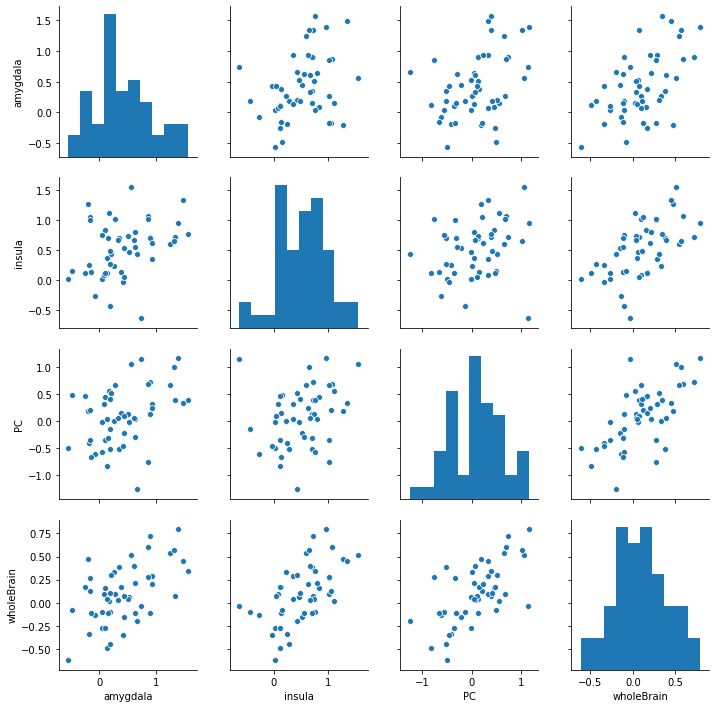

In [397]:
sns.pairplot(amg_ud[['amygdala','insula','PC','wholeBrain']])

## look at group differences

In [398]:
groupDF = pd.read_excel('/media/Data/Lab_Projects/RCF/PTSD_reconsolidation - to sort/TrioB/Scan_data/newer/rcf_scan_table.xls')
groupDF = groupDF[{'subject_id', 'group'}]
groupDF = groupDF.dropna()
groupDF['subject'] = groupDF['subject_id'].astype(int).astype(str)
groupDF=groupDF.drop(columns = ['subject_id'])
for i in groupDF.iterrows():
    # change two numbers to three
    if len(i[1].subject) < 4:
        groupDF.at[i[0],'subject'] = '0' + i[1].subject

groupDF

,group,subject
0,PTSD,035
1,CC,011
4,PTSD,040
7,PTSD,029
10,CC,020
...,...,...
196,HC,1444
199,HC,1445
202,HC,1449
205,CC,1457


In [399]:
# merge group and stimulus data
dfAll = pd.merge(groupDF, amg_ud)
dfAll

,group,subject,amygdala,amgsem,amgstd,insula,insulaStd,PC,PCstd,wholeBrain,wholeStd
0,PTSD,040,0.042481,0.026563,0.627476,0.021910,0.021910,-0.007512,0.317194,-0.271031,0.623235
1,PTSD,029,0.894034,0.039058,0.922628,0.716979,0.716979,0.729067,0.487049,0.723892,1.088020
2,CC,020,0.439733,0.024236,0.572497,0.524512,0.524512,-0.211218,0.265978,-0.155839,0.539576
3,FPTSD,030,-0.202902,0.042334,1.000009,1.264694,1.264694,0.196072,0.510526,0.477430,1.134568
4,FPTSD,1005,0.665053,0.071620,1.691820,0.430266,0.430266,-1.256125,1.263220,-0.194573,1.771012
5,CC,1072,1.484799,0.049571,1.170967,1.339894,1.339894,0.331123,0.559666,0.453995,0.829186
6,PTSD,1074,0.094775,0.039410,0.930932,0.834434,0.834434,0.459120,0.893661,0.156909,0.774026
7,CC,1099,0.896116,0.036809,0.869508,0.698377,0.698377,0.129129,0.409967,-0.107104,0.753781
8,CC,1212,0.275551,0.050738,1.198542,1.013832,1.013832,0.670814,0.700134,0.097896,1.039606
9,CC,1206,0.865302,0.045318,1.070509,1.069766,1.069766,0.700261,0.567793,0.597585,0.830812


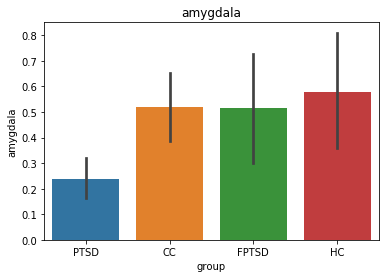

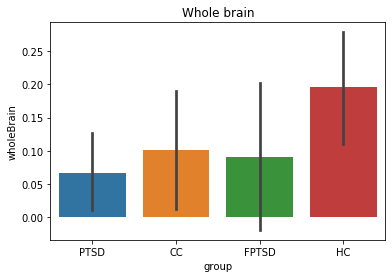

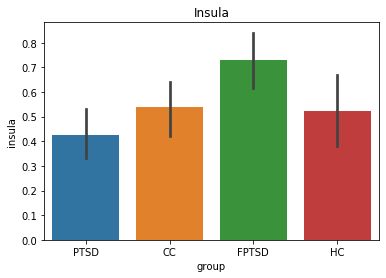

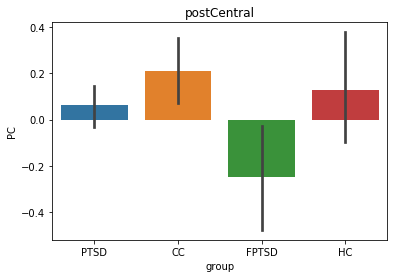

In [400]:
#g = sns.FacetGrid(dfAll, col="group", col_wrap=3)
plt.title("amygdala")
sns.barplot(x="group", y="amygdala", data=dfAll, ci=68)
plt.show()
plt.title("Whole brain")
sns.barplot(x="group", y="wholeBrain", data=dfAll, ci=68)

plt.show()
plt.title("Insula")
sns.barplot(x="group", y="insula", data=dfAll, ci=68)

plt.show()
plt.title("postCentral")
sns.barplot(x="group", y="PC", data=dfAll, ci=68)


In [401]:
t = scipy.stats.ttest_ind(dfAll['amygdala'][dfAll['group']=='CC'],dfAll['amygdala'][dfAll['group']=='PTSD'], 
                     equal_var = True)

# one sided
t[1] /2

0.04260964417118474

In [403]:
## check if significant

fvalue, pvalue = scipy.stats.f_oneway(dfAll['amygdala'][dfAll['group']=='CC'], 
                                      dfAll['amygdala'][dfAll['group']=='PTSD'], 
                                )

pvalue

0.08521928834236941

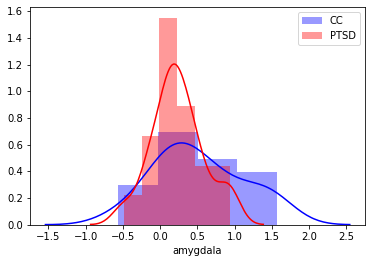

In [404]:
sns.distplot(dfAll['amygdala'][dfAll['group']=='CC'], color = 'blue', label = 'CC')
sns.distplot(dfAll['amygdala'][dfAll['group']=='PTSD'], color = 'red', label = 'PTSD')
plt.legend()

## Now lets list subjects that should be removed from analyses

In [289]:
remove = []
for i in dfAll.iterrows():
    meanAct = i[1].amygdala
    stdAct = i[1]['amgstd']
   # print(stdAct)
    tScore = meanAct / stdAct
    
    if tScore<=0:
        remove.append('remove')
    else:
        remove.append('stay')
dfAll['remove'] = remove

In [290]:
dfAll.groupby(['remove']).count()

,group,subject,amygdala,amgsem,amgstd,insula,insulaStd,PC,PCstd,wholeBrain,wholeStd
remove,,,,,,,,,,,
remove,9,9,9,9,9,9,9,9,9,9,9
stay,35,35,35,35,35,35,35,35,35,35,35


In [291]:
subject_keep = dfAll[dfAll['remove']=='stay'].subject
np.array(subject_keep)

array(['040', '029', '020', '1005', '1072', '1074', '1099', '1212',
       '1206', '1216', '1245', '1258', '1205', '1272', '1254', '1290',
       '1291', '1301', '1309', '1337', '1340', '1343', '1345', '1346',
       '1350', '1362', '1374', '1378', '1379', '1384', '1388', '1393',
       '1431', '1432', '1457'], dtype=object)

## Lets compare to SCR data

In [405]:
## read
scr_df = pd.read_csv("/media/Data/Lab_Projects/RCF/AnalysisOverview_Or.csv")
scr = scr_df[['subject','ResponseShock', 'validnonUSresponses']]
scr['subject'] = scr['subject'].astype(str)
for i in scr.iterrows():
    # change two numbers to three
    if len(i[1].subject) < 4:
        scr.at[i[0],'subject'] = '0' + i[1].subject
scr['sumResp'] = scr.ResponseShock + scr.validnonUSresponses
scr

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,subject,ResponseShock,validnonUSresponses,sumResp
0,020,14,7,21
1,029,14,4,18
2,030,14,12,26
3,038,0,2,2
4,040,14,10,24
...,...,...,...,...
63,1444,0,0,0
64,1445,2,8,10
65,1449,10,5,15
66,1457,14,21,35


In [378]:
# setting threshold to 10 responses to shock 
a = list(scr_df['subject'][scr_df['ResponseShock']>=10])
b = list(map(str, a))
np.array(b)

array(['20', '29', '30', '40', '1005', '1072', '1074', '1099', '1205',
       '1206', '1212', '1216', '1220', '1223', '1237', '1245', '1247',
       '1254', '1258', '1266', '1268', '1269', '1271', '1272', '1280',
       '1290', '1291', '1301', '1309', '1319', '1320', '1337', '1340',
       '1343', '1345', '1346', '1350', '1357', '1359', '1362', '1373',
       '1374', '1376', '1378', '1379', '1384', '1388', '1392', '1393',
       '1431', '1432', '1440', '1449', '1457', '1460'], dtype='<U4')

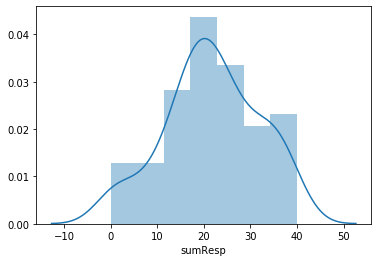

In [294]:
sns.distplot(scr.sumResp)

In [408]:
dfWScr = pd.merge(scr,dfAll)
#print(dfWScr)
dfWScr.groupby(['group']).count()


,subject,ResponseShock,validnonUSresponses,sumResp,amygdala,amgsem,amgstd,insula,insulaStd,PC,PCstd,wholeBrain,wholeStd
group,,,,,,,,,,,,,
CC,19,19,19,19,19,19,19,19,19,19,19,19,19
FPTSD,6,6,6,6,6,6,6,6,6,6,6,6,6
HC,6,6,6,6,6,6,6,6,6,6,6,6,6
PTSD,19,19,19,19,19,19,19,19,19,19,19,19,19


correlcation is (0.21598379638619405, 0.1590975915719234)


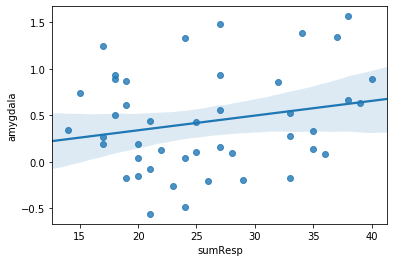

In [406]:
print(f'correlcation is {scipy.stats.pearsonr(dfWScr.sumResp, dfWScr.amygdala)}')
sns.regplot('sumResp', 'amygdala', data=dfWScr)

correlcation is (-0.042288987244237165, 0.7851916223452395)


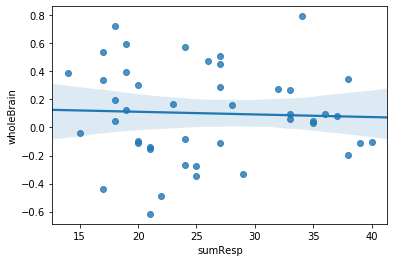

In [297]:
print(f'correlcation is {scipy.stats.pearsonr(dfWScr.sumResp, dfWScr.wholeBrain)}')
sns.regplot('sumResp', 'wholeBrain', data=dfWScr)

correlcation is (0.23227702665833785, 0.12920803130729805)


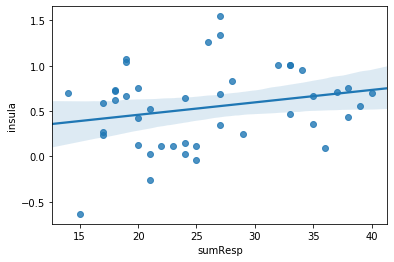

In [298]:
print(f'correlcation is {scipy.stats.pearsonr(dfWScr.sumResp, dfWScr.insula)}')
sns.regplot('sumResp', 'insula', data=dfWScr)

correlcation is (-0.04323976606626472, 0.7804801187496544)


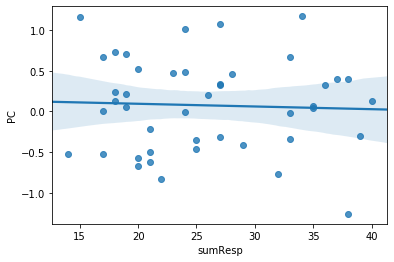

In [299]:
print(f'correlcation is {scipy.stats.pearsonr(dfWScr.sumResp, dfWScr.PC)}')
sns.regplot('sumResp', 'PC', data=dfWScr)

### Next - lets look at the specific activation in amygdala and see if there is a region with more activation

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/plotting/displays.py:602: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


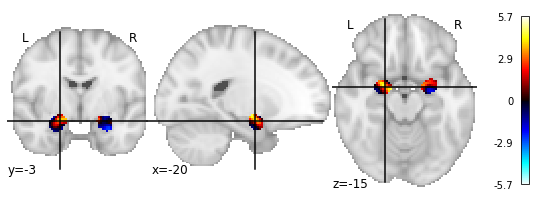

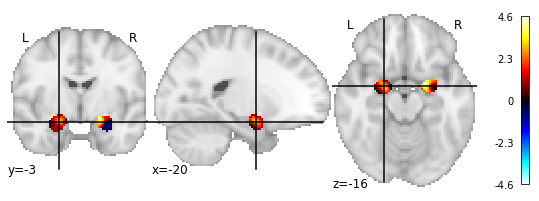

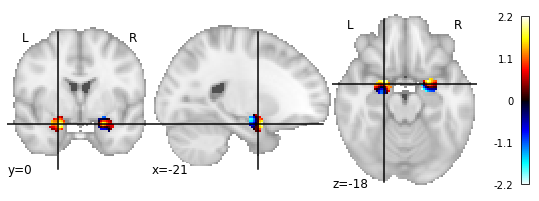

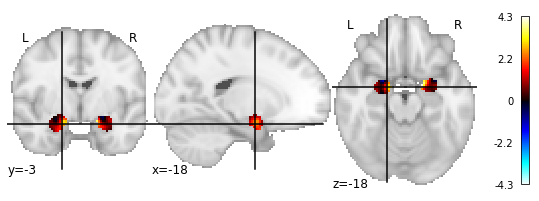

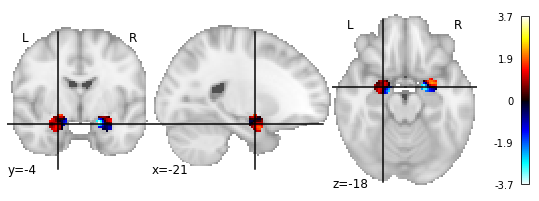

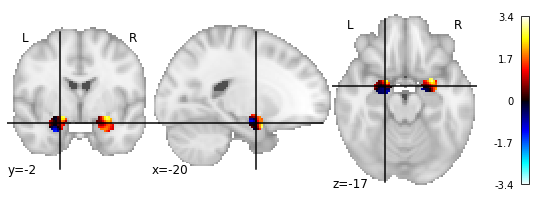

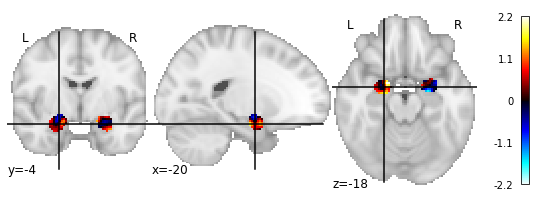

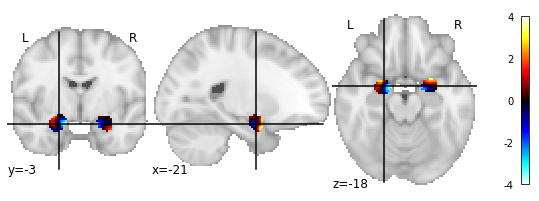

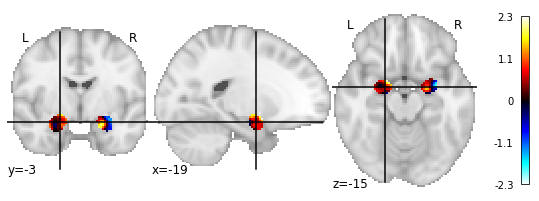

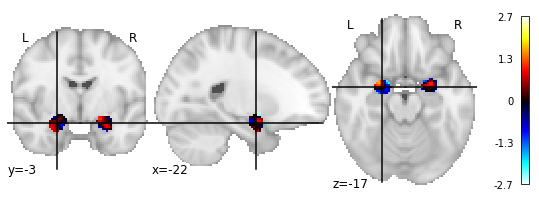

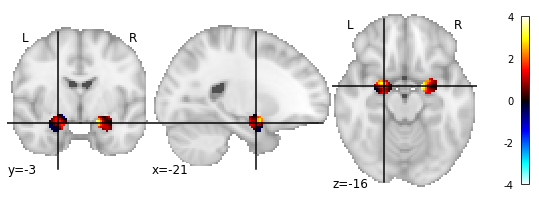

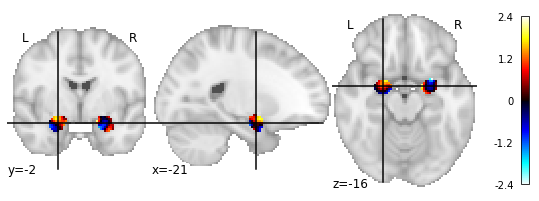

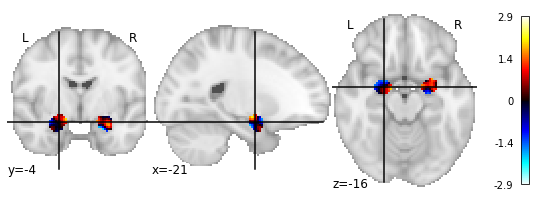

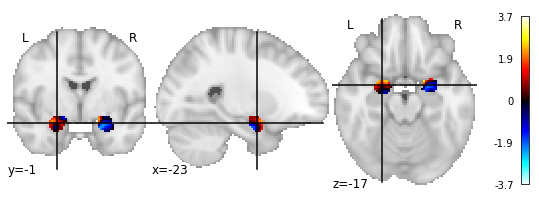

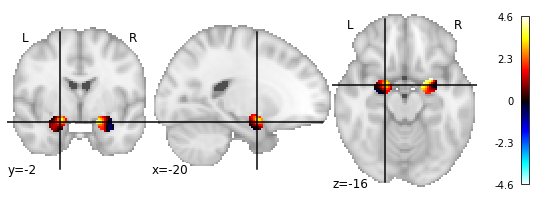

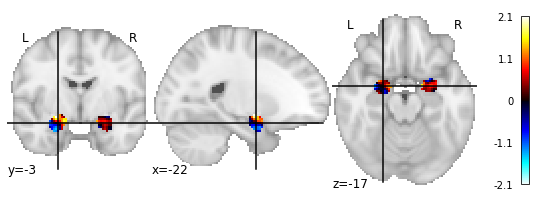

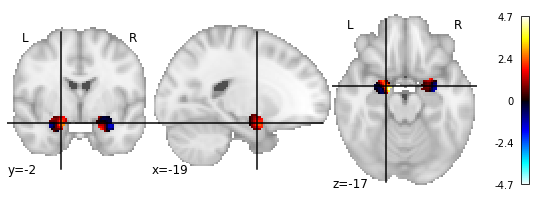

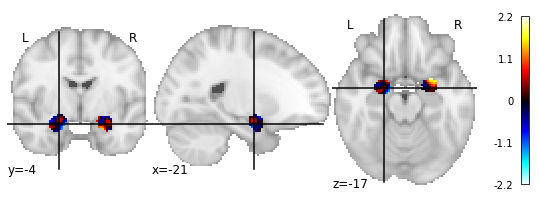

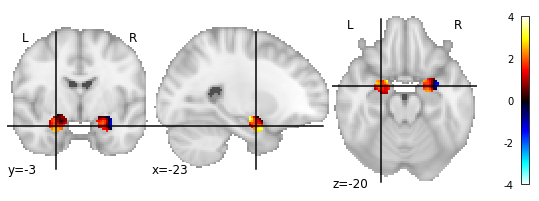

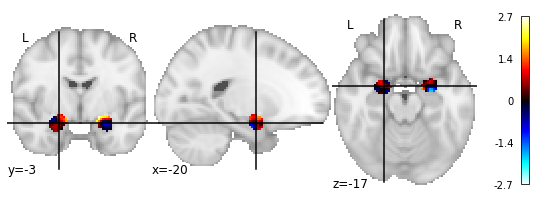

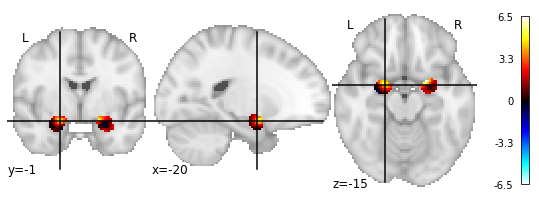

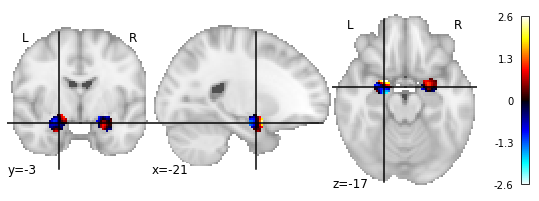

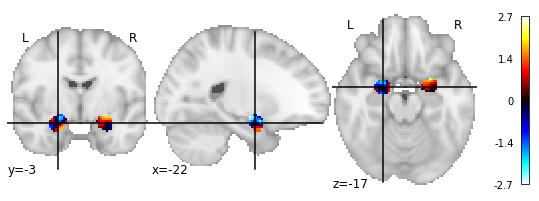

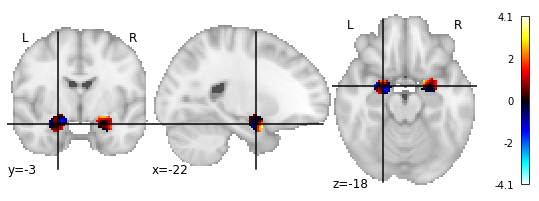

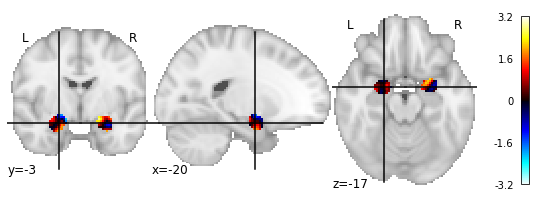

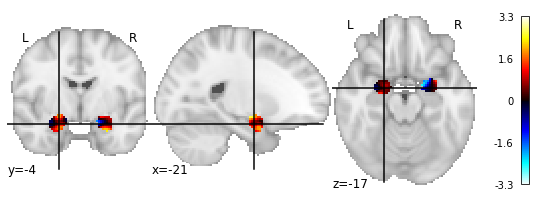

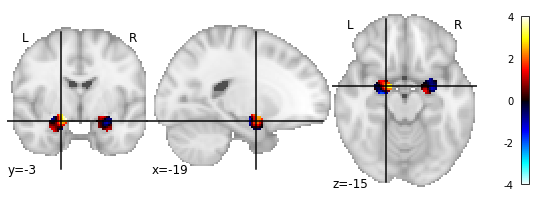

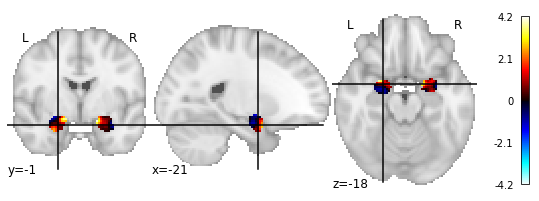

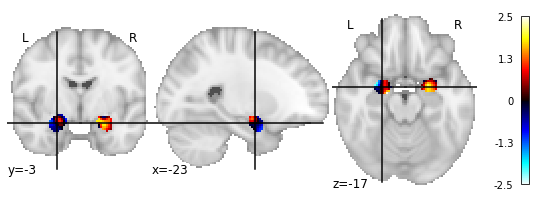

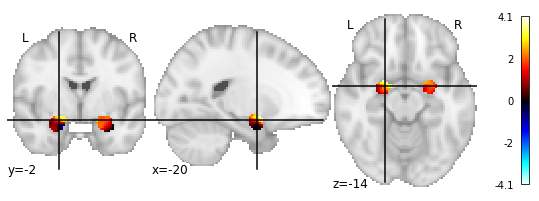

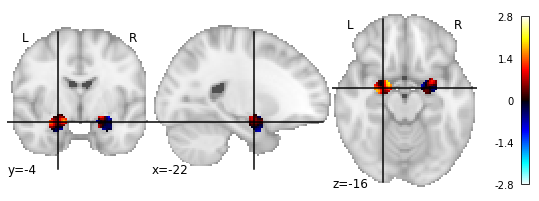

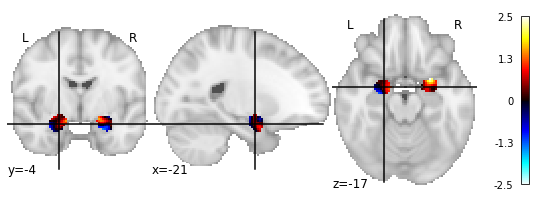

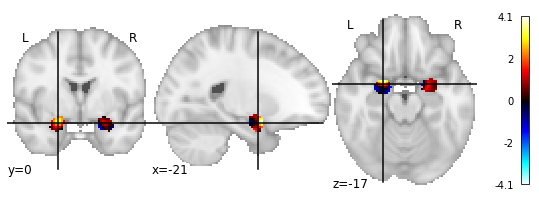

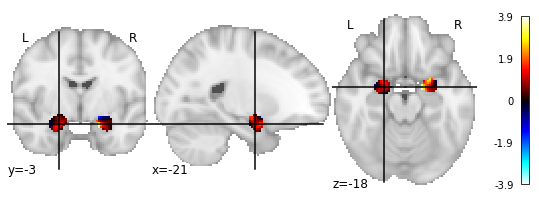

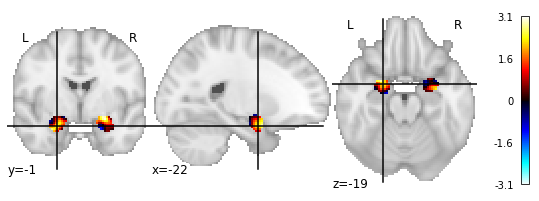

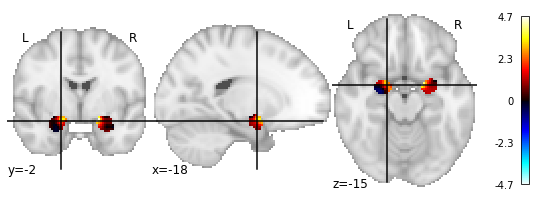

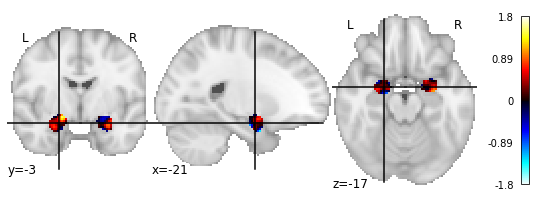

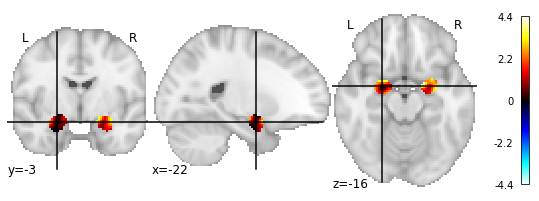

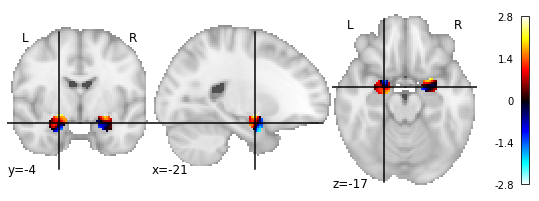

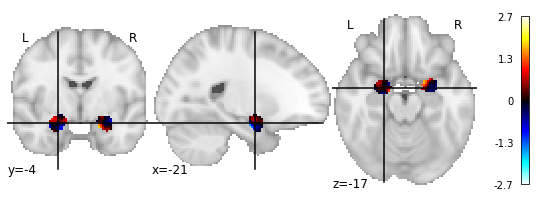

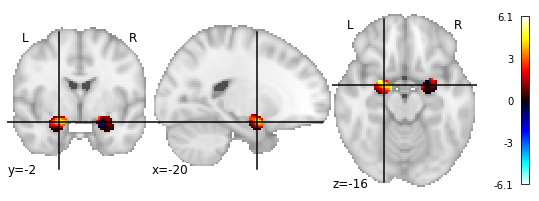

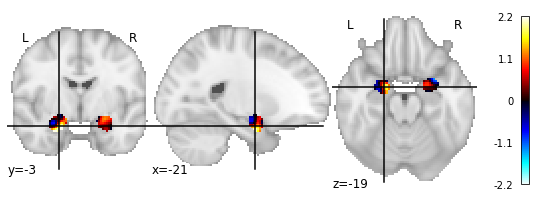

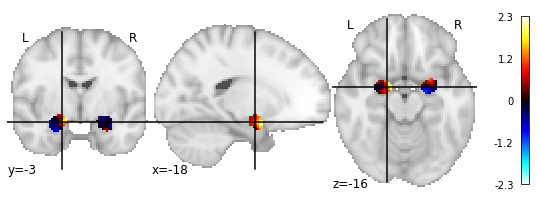

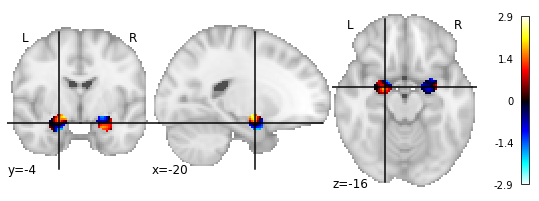

In [117]:
for sub in subject_keep:
    a = tsDf['ts'][tsDf.subject==sub]
    img = masker.inverse_transform(np.array(a)[0])
    nilearn.plotting.plot_stat_map(img)

In [55]:
a = tsDf['ts'][tsDf.subject==sub]
np.array(a)[0]

array([-8.79015982e-01, -1.56316593e-01,  6.89032674e-01,  5.63764513e-01,
        9.10333991e-01, -2.50879455e+00, -1.28201675e+00, -3.17628384e-01,
       -3.85204077e-01, -2.81653929e+00, -2.13225698e+00, -8.15416694e-01,
        1.19923912e-01, -2.62179263e-02, -1.08467972e+00, -1.74460673e+00,
       -9.63989735e-01,  5.08102328e-02,  5.53210974e-01,  6.74605668e-02,
       -1.22899902e+00, -3.99340868e-01,  2.14362055e-01,  6.42656624e-01,
        5.05700409e-01, -5.06569743e-01,  3.27885062e-01,  5.43717325e-01,
        3.89463902e-01, -2.67111629e-01, -1.71491838e+00, -1.14192855e+00,
       -1.05106986e+00, -1.61740899e+00, -3.24123573e+00, -2.15894127e+00,
       -1.24400175e+00, -1.28258908e+00, -2.11492395e+00, -3.01115465e+00,
       -3.26527381e+00, -2.69839406e+00, -1.51045442e+00, -7.25492954e-01,
       -9.06002402e-01, -1.82799149e+00, -2.87972689e+00, -2.45700836e+00,
       -2.14828420e+00, -1.28475785e+00, -3.05024266e-01,  6.82788268e-02,
       -4.37050313e-01, -

## Use STAN to check differences

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,group,subject,amygdala,amgsem,amgstd,insula,insulaStd,PC,PCstd,wholeBrain,wholeStd
0,2,040,0.042481,0.026563,0.627476,0.021910,0.021910,-0.007512,0.317194,-0.271031,0.623235
1,2,029,0.894034,0.039058,0.922628,0.716979,0.716979,0.729067,0.487049,0.723892,1.088020
2,1,020,0.439733,0.024236,0.572497,0.524512,0.524512,-0.211218,0.265978,-0.155839,0.539576
5,1,1072,1.484799,0.049571,1.170967,1.339894,1.339894,0.331123,0.559666,0.453995,0.829186
6,2,1074,0.094775,0.039410,0.930932,0.834434,0.834434,0.459120,0.893661,0.156909,0.774026
7,1,1099,0.896116,0.036809,0.869508,0.698377,0.698377,0.129129,0.409967,-0.107104,0.753781
8,1,1212,0.275551,0.050738,1.198542,1.013832,1.013832,0.670814,0.700134,0.097896,1.039606
9,1,1206,0.865302,0.045318,1.070509,1.069766,1.069766,0.700261,0.567793,0.597585,0.830812
10,1,1216,0.265759,0.028132,0.664545,0.234650,0.234650,0.009284,0.431424,0.336195,0.751574
11,2,1247,-0.173587,0.032361,0.764443,1.041687,1.041687,0.212798,0.491188,0.125242,0.771689


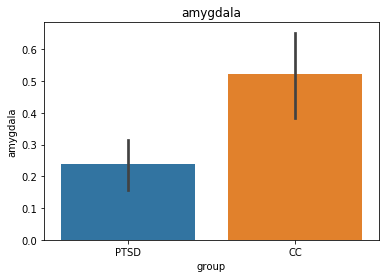

In [428]:
#To select rows whose column value is in list 
groups = ["CC", "PTSD"]
dg = dfAll[dfAll.group.isin(groups)]
plt.title("amygdala")
sns.barplot(x="group", y="amygdala", data=dg, ci=68)
#dg = dg[dg['remove']=='stay']
# changing group to numbers before we run stan model
group = {'CC': 1,'PTSD': 2} 
dg.group = [group[item] for item in dg.group] 
dg

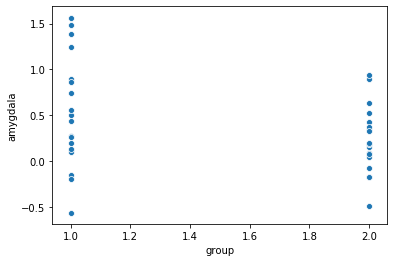

In [425]:
sns.scatterplot(y='amygdala',x='group', data=dg)

In [411]:
model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    
    real<lower=0> sigma;
}
model {
    y ~ normal(alpha + beta * x , sigma);
}
"""

In [412]:
import pystan

data = data = {'N': len(dg), 'x': dg['group'], 'y': dg['amygdala']}
sm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5779d2ec315589866a49d4f01adc0515 NOW.


In [413]:
# Train the model and generate samples
fit = sm.sampling(data=data, iter=50000, chains=4, warmup=1000, thin=1, seed=101)

In [414]:
fit

Inference for Stan model: anon_model_5779d2ec315589866a49d4f01adc0515.
4 chains, each with iter=50000; warmup=1000; thin=1; 
post-warmup draws per chain=49000, total post-warmup draws=196000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha    0.8  9.7e-4   0.26   0.28   0.63    0.8   0.98   1.32  73448    1.0
beta   -0.28  6.1e-4   0.17  -0.61  -0.39  -0.28  -0.17   0.05  73362    1.0
sigma   0.51  2.1e-4   0.06   0.41   0.47    0.5   0.55   0.65  90021    1.0
lp__    6.65  5.0e-3   1.28   3.35   6.07   6.98   7.58    8.1  64210    1.0

Samples were drawn using NUTS at Fri Jun 12 16:40:11 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [415]:
summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

alpha_mean, beta_mean = df['mean']['alpha'], df['mean']['beta']

# Extracting traces
alpha = fit['alpha']
beta = fit['beta']
sigma = fit['sigma']
lp = fit['lp__']

0.9550867346938775

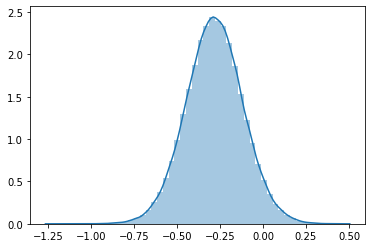

In [416]:
sns.distplot(beta)
sum(beta<0) / len(beta)